In [163]:
import pandas as pd
import numpy as  np
import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTENC


In [164]:
# Load the dataset
df = pd.read_csv("/home/karera/Desktop/SEMISTER11/big data/Churndata(1).csv")


In [165]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [141]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [166]:
df.shape

(7043, 21)

In [167]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [168]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [170]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [171]:
df.duplicated().sum()

np.int64(0)

In [172]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [173]:
# Convert 'TotalCharges' to numeric, coerce errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [174]:

# Check missing values across all columns
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [175]:

# Numeric columns: fill missing values with median
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in numeric_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"✅ Imputed {missing_count} missing values in numeric column '{col}' with median: {median_val}")

# Categorical columns: fill missing values with mode
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"✅ Imputed {missing_count} missing values in categorical column '{col}' with mode: '{mode_val}'")

# ---------------------------
# Verify missing values
# ---------------------------

print("\n✅ Missing values per column after imputation:")
print(df.isnull().sum())

✅ Imputed 11 missing values in numeric column 'TotalCharges' with median: 1397.475

✅ Missing values per column after imputation:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipykernel_8508/1999009610.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


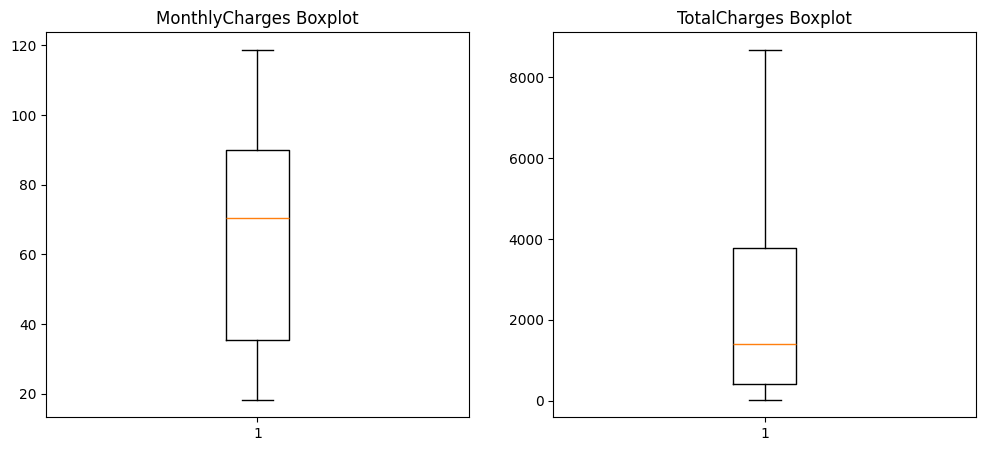

MonthlyCharges outliers count: 0
TotalCharges outliers count: 0
After capping:
       MonthlyCharges  TotalCharges
count     7043.000000   7043.000000
mean        64.761692   2281.916928
std         30.090047   2265.270398
min         18.250000     18.800000
25%         35.500000    402.225000
50%         70.350000   1397.475000
75%         89.850000   3786.600000
max        118.750000   8684.800000


In [176]:
# step 2: outlier  detection  and  treatmet
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Visualize outliers
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.boxplot(df['MonthlyCharges'])
plt.title('MonthlyCharges Boxplot')

plt.subplot(1, 2, 2)
plt.boxplot(df['TotalCharges'])
plt.title('TotalCharges Boxplot')

plt.show()

# Step 2: Detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

monthly_outliers = detect_outliers_iqr(df, 'MonthlyCharges')
total_outliers = detect_outliers_iqr(df, 'TotalCharges')

print("MonthlyCharges outliers count:", monthly_outliers.shape[0])
print("TotalCharges outliers count:", total_outliers.shape[0])

# Step 3: Cap outliers (Winsorization)
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

cap_outliers_iqr(df, 'MonthlyCharges')
cap_outliers_iqr(df, 'TotalCharges')

# Step 4: Verify
print("After capping:")
print(df[['MonthlyCharges','TotalCharges']].describe())


In [177]:
# ---------------------------
# Data Transformation: Categorical Encoding + Tenure Grouping
# ---------------------------

# 1️⃣ Transform 'tenure' into interpretable bins
df["TenureGroup"] = pd.cut(
    df["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0-1yr", "1-2yr", "2-4yr", "4-6yr"]
)

# 2️⃣ Identify categorical and numerical features
categorical_features = [
    "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod", "TenureGroup"
]

numerical_features = ["SeniorCitizen", "tenure", "MonthlyCharges"]

# 3️⃣ Build preprocessing pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

# 4️⃣ Apply transformations
X = df[numerical_features + categorical_features]
y = df["Churn"].map({"No": 0, "Yes": 1})

X_transformed = preprocessor.fit_transform(X)

print("Data Transformation completed!")
print("Transformed feature shape:", X_transformed.shape)


Data Transformation completed!
Transformed feature shape: (7043, 32)


In [178]:
import pandas as pd
import numpy as np

# ---------------------------
# 1️⃣ Load your original Telco dataset
# ---------------------------
df = pd.read_csv("/home/karera/Desktop/SEMISTER11/big data/Churndata(1).csv")

# ---------------------------
# 2️⃣ Simulate a fake internet plan dataset
# Each customer gets a random Speed and DataAllowance
# ---------------------------
np.random.seed(42)  # for reproducibility

internet_plans_df = pd.DataFrame({
    "customerID": df["customerID"],  # same customer IDs
    "Speed": np.random.choice([10, 50, 100, 200], size=len(df)),           # Mbps
    "DataAllowance": np.random.choice([50, 100, 200, 500], size=len(df))   # GB
})

# ---------------------------
# 3️⃣ Merge the simulated internet plans with the original Telco dataset
# ---------------------------
df = df.merge(internet_plans_df, on="customerID", how="left")

# ---------------------------
# 4️⃣ Check the new shape and head of the dataframe
# ---------------------------
print("New dataset shape:", df.shape)  # should be (7043, 23)
print(df.head())


New dataset shape: (7043, 23)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling            

In [179]:
# ---------------------------
# Data Reduction: Remove ID column
# ---------------------------

# Drop the 'customerID' column
df.drop(columns=["customerID"], inplace=True)

# Verify the column is removed
print("Columns after dropping 'customerID':")
print(df.columns)
print("New dataset shape:", df.shape)


Columns after dropping 'customerID':
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Speed', 'DataAllowance'],
      dtype='object')
New dataset shape: (7043, 22)


Churn class distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn class percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


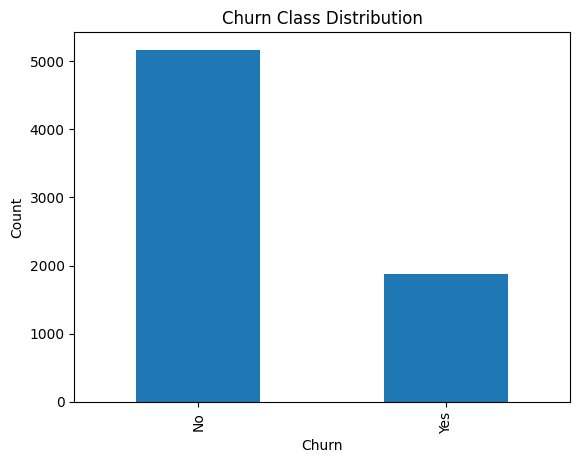

In [180]:
# -----------------------------------
# Check class imbalance in Churn
# -----------------------------------

# 1️⃣ Count how many customers churned vs not churned
class_counts = df["Churn"].value_counts()

print("Churn class distribution:")
print(class_counts)

# 2️⃣ Show percentage distribution
class_percent = df["Churn"].value_counts(normalize=True) * 100

print("\nChurn class percentage:")
print(class_percent)

# 3️⃣ Optional: simple visualization
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


In [181]:

# Convert target variable
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# ---------------------------
# 2️⃣ Detect categorical columns
# ---------------------------
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

print("Categorical columns:", list(categorical_cols))

# ---------------------------
# 3️⃣ Apply SMOTENC
# ---------------------------
smote_nc = SMOTENC(
    categorical_features=categorical_indices,
    random_state=42
)

X_balanced, y_balanced = smote_nc.fit_resample(X, y)

# ---------------------------
# 4️⃣ Rebuild balanced dataset
# ---------------------------
df_balanced = pd.concat(
    [pd.DataFrame(X_balanced, columns=X.columns),
     pd.Series(y_balanced, name="Churn")],
    axis=1
)

# ---------------------------
# 5️⃣ Verify balancing
# ---------------------------
print("\nClass distribution AFTER balancing:")
print(df_balanced["Churn"].value_counts())

print("\nBalanced dataset shape:", df_balanced.shape)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']

Class distribution AFTER balancing:
Churn
0    5174
1    5174
Name: count, dtype: int64

Balanced dataset shape: (10348, 22)
